In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
signature_fn = sorted(glob.glob(os.path.join('..', 'results', '*', 'biomart.csv')))
signature_dir = [os.path.split(fn)[0] for fn in signature_fn]
signature_dict = {os.path.split(signature_dir[i])[1] : fn for i, fn in enumerate(signature_fn)}
for key in signature_dict:
    signature_dict[key] = pd.read_csv(signature_dict[key])
    print(key, signature_dict[key])

GSE136689    mmusculus hsapiens
0      Map1b    MAP1B
1       Irx1     IRX1
2        Id2      ID2
3     Homer2   HOMER2
4        Clu      CLU
..       ...      ...
67     Aldoa    ALDOA
68       Mmd      MMD
69      Peg3     PEG3
70   Slc16a3  SLC16A3
71    Mpped2   MPPED2

[72 rows x 2 columns]
GSE162534     mmusculus  hsapiens
0        Cdh2      CDH2
1       Greb1     GREB1
2        Sqle      SQLE
3    Tnfrsf19  TNFRSF19
4       Rspo3     RSPO3
..        ...       ...
201      Cst3      CST3
202    Mogat2    MOGAT2
203  Serpinh1  SERPINH1
204       Sp5       SP5
205      Peg3      PEG3

[206 rows x 2 columns]
GSE201257     mmusculus hsapiens
0     Phactr1  PHACTR1
1       Vcam1    VCAM1
2         Fos      FOS
3     Ppp1r1a  PPP1R1A
4     Spata13  SPATA13
..        ...      ...
148     Celf2    CELF2
149    Arpc1b   ARPC1B
150     Gdpd5    GDPD5
151    Tom1l1   TOM1L1
152     Mfap4    MFAP4

[153 rows x 2 columns]
GSE229103     mmusculus hsapiens
0        Fbn2     FBN2
1       Greb1  

In [6]:
jac_ix = signature_dict.keys()
jac = pd.DataFrame(0., index = jac_ix, columns = jac_ix)
for ix in jac.columns:
    g1 = set(signature_dict[ix].mmusculus)
    for jx in jac.columns:
        g2 = set(signature_dict[jx].mmusculus)
        jac.loc[ix, jx] = len(g1 & g2) / len(g1 | g2)

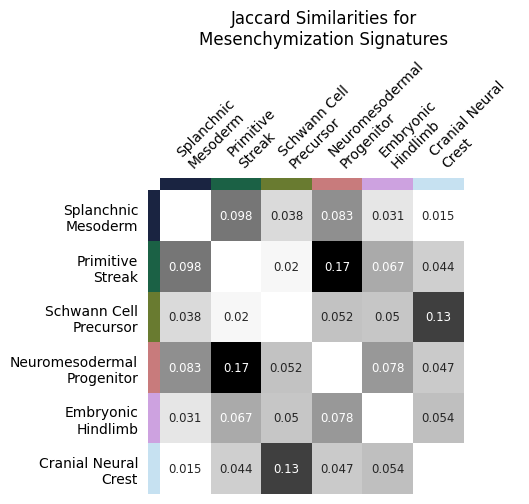

In [17]:
summary_fn =  os.path.join('..', '..', 'data', 'summary.csv')
summary_df = pd.read_csv(summary_fn, index_col = 0).sort_index()
colors = sns.color_palette('cubehelix', summary_df.shape[0]).as_hex()

g = sns.clustermap(
    jac,
    mask = np.eye(jac.shape[0]),
    row_cluster = False,
    col_cluster = False,
    cmap = 'binary',
    annot = True,
    annot_kws = {'fontsize' : 8.5},
    col_colors = colors,
    row_colors = colors,
    colors_ratio = .03,
    figsize = (6, 6))

for ax in (g.ax_cbar, g.ax_col_dendrogram, g.ax_row_dendrogram):
    ax.remove()

for ax in (g.ax_heatmap, g.ax_col_colors, g.ax_row_colors):
    ax.set_xticks([])
    ax.set_yticks([])

labels = summary_df.name.map(lambda val: '\n'.join(val.rsplit(' ', 1)) if len(val) > 15 and ' ' in val else val)
ticks = np.arange(labels.size) + .5
g.ax_row_colors.set_yticks(ticks, labels)
g.ax_col_colors.set_xticks(ticks, labels, rotation = 45, rotation_mode = 'anchor', ha = 'left', va = 'center')
g.ax_row_colors.tick_params('y', left = False, labelleft = True)
g.ax_col_colors.tick_params('x', bottom = False, labelbottom = False, labeltop = True, pad = 10)
g.figure.suptitle('Jaccard Similarities for\nMesenchymization Signatures', x = .45, y = 1.125)
plt.show()